In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# Image size and batch
img_size = (128, 128)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load testing data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Print class indices (e.g., {'male': 0, 'female': 1})
print(train_data.class_indices)


Found 7000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'Female': 0, 'Male': 1}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Male/Female)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 15  # Adjust as needed

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)


Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 136ms/step - accuracy: 0.9260 - loss: 0.1859 - val_accuracy: 0.9490 - val_loss: 0.1348
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.9356 - loss: 0.1664 - val_accuracy: 0.9540 - val_loss: 0.1249
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 29s 134ms/step - accuracy: 0.9433 - loss: 0.1461 - val_accuracy: 0.9540 - val_loss: 0.1160
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.9476 - loss: 0.1390 - val_accuracy: 0.9570 - val_loss: 0.1125
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.9464 - loss: 0.1479 - val_accuracy: 0.9610 - val_loss: 0.1220
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 138ms/step - accuracy: 0.9553 - loss: 0.1257 - val_accuracy: 0.9590 - val_loss: 0.1052
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 137ms/step - accuracy: 0.9473 - loss: 0.1325 - val_accuracy: 0.9600 - val_loss: 0.1004
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 139ms/step - accuracy: 0.9557 - loss: 0

In [ ]:
model.save("face_gender_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("face_gender_model.h5")


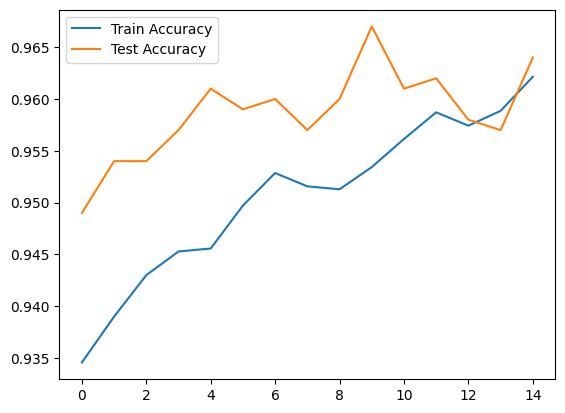

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4110 - loss: 0.7005
Test Accuracy: 41.70%


In [ ]:
# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

# Evaluate model on test set
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# prompt: code to check input imagae from user inputed image from computr

import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Load and preprocess the uploaded image
  img_path = fn  # Use the uploaded file name
  img = image.load_img(img_path, target_size=(128, 128))
  img_array = image.img_to_array(img) / 255.0
  img_array = np.expand_dims(img_array, axis=0)

  # Predict
  prediction = model.predict(img_array)[0][0]
  gender = "male" if prediction > 0.5 else "female"
  print(f"Predicted Gender for {fn}: {gender}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


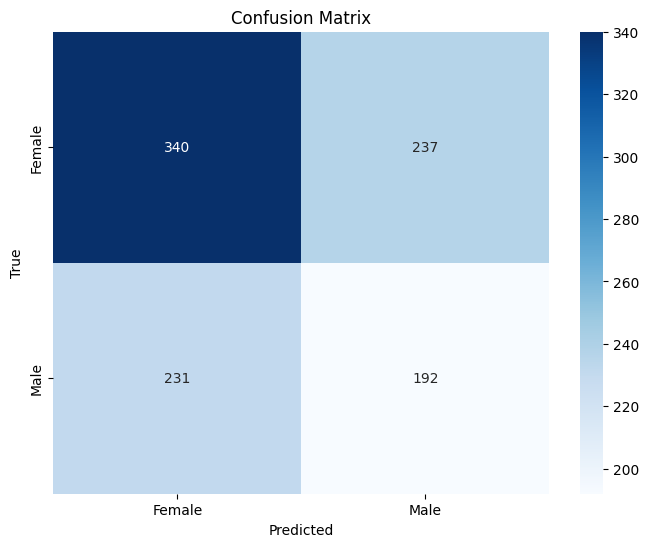

In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (Your existing code for model training and loading) ...

# Generate predictions for the test set
predictions = model.predict(test_data)
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes

# Get true labels
y_true = test_data.classes


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
# Load trained model
model_path = "/content/face_gender_model.h5"  # Update with the correct path

model = load_model(model_path)


# Function to compute Treatment Equality
def treatment_equality(y_true, y_pred, sensitive_attr):
    groups = np.unique(sensitive_attr)

    fpr, fnr = {}, {}
    for group in groups:
        indices = (sensitive_attr == group)
        cm = confusion_matrix(y_true[indices], y_pred[indices])

        TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

        fpr[group] = FP / (FP + TN) if (FP + TN) > 0 else 0
        fnr[group] = FN / (FN + TP) if (FN + TP) > 0 else 0

    treatment_eq = {group: fpr[group] / fnr[group] if fnr[group] > 0 else float('inf') for group in groups}

    return treatment_eq

# Example usage
y_true = np.array([1, 0, 1, 0, 1, 0])  # Replace with actual labels
y_pred = np.array([1, 0, 0, 1, 1, 0])  # Replace with model predictions
sensitive_attr = np.array(["A", "A", "B", "B", "A", "B"])  # Sensitive attribute values

result = treatment_equality(y_true, y_pred, sensitive_attr)
print("Treatment Equality Metric:", result)


Treatment Equality Metric: {'A': inf, 'B': 0.5}
